4 columnas numéricas

* price
* bedrooms
* bathrooms
* m2
* address (quitarle lo de ", Madrid" con numpy)

En cada apartado hacer visualizaciones con matplotlib o seaborn.

* 25 %:

* Carga de datos: cargarlo con np.genfromtext usar encoding="utf-8"
* Media, mediana
* Máximo y mínimo
* histograma y curva de densidad

* 25 %

* Cuartiles: Q1 (25), Q2 (50), Q3 (75)
* IQR
* Filtrar 20 % más caro, y el 20 % más barato
* Opcional: filtrar los barrios 20 % más baratos
* Moda: calcular moda también de address
* Opcional: Moda de los barrios más baratos y más caros
* Dispersión: varianza y desviación estándar

25 % 

* Filtro de outliers: tukey, z-score, marcar en un gráfico los límites de outliers: rojo y azul.
* Correlación: calcular la matriz y pintarla con matplotlib/seaborn
* Estandarización

25 % 

* Asimetría y curtosis
* Transformar distribuciones e interpretar resultados
* Contraste de hipótesis:
    * Que las casas de X barrio son más baratas de las de Y barrio
    * Que las casas de >= 3 baños son más caras que las casas de 1-2 baños


Entrega: 27/12

### IMPORTACION LIBRERIAS NECESARIAS

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pickle as pkl
import seaborn as sns
from collections import Counter
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import ttest_ind

### IMPORTACION DE LAS COLUMNAS DE LOS ARCHIVOS

In [4]:
price = np.genfromtxt("../Data/idealista_madrid.csv", usecols = (0), dtype = int, delimiter = ",", skip_header = 1, encoding = "utf_8" )
baths = np.genfromtxt("../Data/idealista_madrid.csv", usecols = (1), dtype = int, delimiter =",", skip_header = 1, encoding = "utf_8" )
roms = np.genfromtxt("../Data/idealista_madrid.csv", usecols = (2), dtype = int, delimiter =",", skip_header = 1, encoding = "utf_8" )
meters = np.genfromtxt("../Data/idealista_madrid.csv", usecols = (3), dtype = int, delimiter =",", skip_header = 1, encoding = "utf_8" )
address = np.genfromtxt("../Data/idealista_madrid.csv", usecols = (4), dtype = str, delimiter =",", skip_header = 1, encoding = "utf_8" )

### MEDIAS, MEDIANAS, MAXIMOS Y MINIMOS

In [5]:

# Media
print("MEDIAS")
print(f"El coste medio de las viviendas es: {np.mean(price):.2f}")
print(f"La media de baños es: {np.mean(baths):.2f}")
print(f"La media de habitaciones es: {np.mean(roms):.2f}")
print(f"La media de metros cuadrados es: {np.mean(meters):.2f}\n")

# Mediana
print("MEDIANAS")
print(f"La mediana del precio es: {np.median(price):.2f}")
print(f"La mediana de los baños es: {np.median(baths):.0f}")
print(f"La mediana de las habitaciones es: {np.median(roms):.0f}")
print(f"La mediana de metros cuadrados es: {np.median(meters):.2f}\n")

# Máximo y mínimo
print("MAXIMOS")
print(f"La casa mas cara tiene un coste de: {np.max(price):.2f}")
print(f"La casa que mas baños tiene posee: {np.max(baths):.2f}")
print(f"La casa que mas habitaciones tiene posee: {np.max(roms):.2f}")
print(f"La casa que mas metros cuadrados tiene posee: {np.max(meters):.2f}\n")

print("MINIMOS")
print(f"La casa mas economica tiene un coste de: {np.min(price)}")
print(f"La casa que menos baños posee tiene: {np.min(baths)}")
print(f"La casa que menos habitaciones posee tiene: {np.min(roms)}")
print(f"La casa que menos metros cuadrados posee tiene: {np.min(meters)}\n")

MEDIAS
El coste medio de las viviendas es: 1290575.26
La media de baños es: 2.90
La media de habitaciones es: 3.47
La media de metros cuadrados es: 217.24

MEDIANAS
La mediana del precio es: 990000.00
La mediana de los baños es: 3
La mediana de las habitaciones es: 3
La mediana de metros cuadrados es: 158.00

MAXIMOS
La casa mas cara tiene un coste de: 8900000.00
La casa que mas baños tiene posee: 12.00
La casa que mas habitaciones tiene posee: 12.00
La casa que mas metros cuadrados tiene posee: 1768.00

MINIMOS
La casa mas economica tiene un coste de: 122000
La casa que menos baños posee tiene: 1
La casa que menos habitaciones posee tiene: 0
La casa que menos metros cuadrados posee tiene: 14



### HISTOGRAMAS Y CURVAS DE DENSIDAD

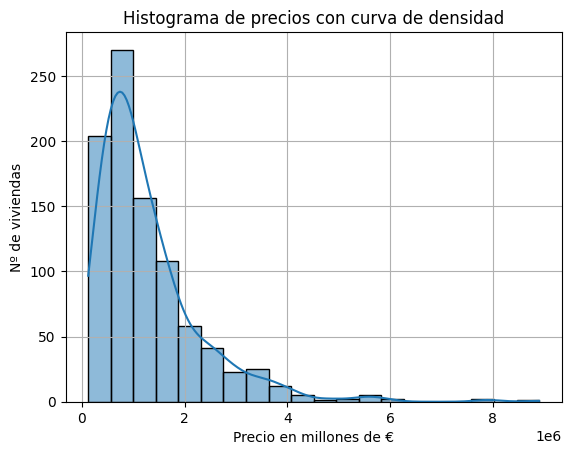

In [6]:
# histograma y curva de densidad
sns.histplot(price, kde=True, bins=20,);
plt.title("Histograma de precios con curva de densidad")
plt.xlabel("Precio en millones de €")
plt.ylabel("Nº de viviendas")
plt.grid()

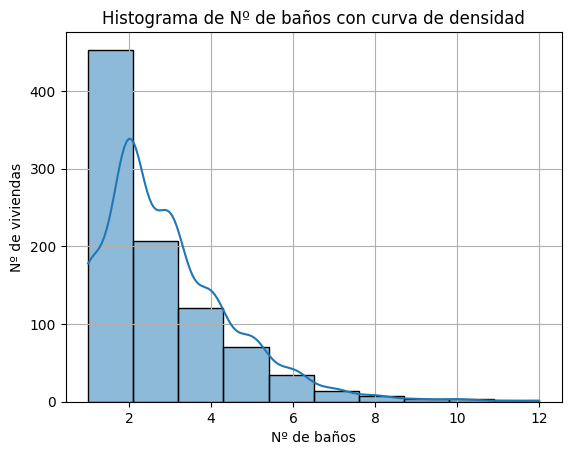

In [7]:
sns.histplot(baths, kde=True, bins=10,);
plt.title("Histograma de Nº de baños con curva de densidad")
plt.xlabel("Nº de baños")
plt.ylabel("Nº de viviendas")
plt.grid()

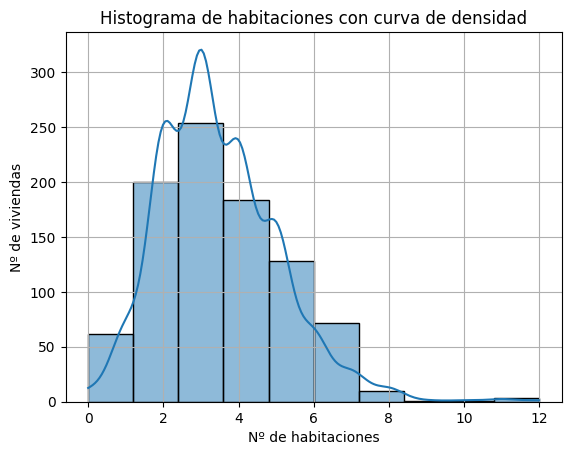

In [8]:
sns.histplot(roms, kde=True, bins=10,);
plt.title("Histograma de habitaciones con curva de densidad")
plt.xlabel("Nº de habitaciones")
plt.ylabel("Nº de viviendas")
plt.grid()

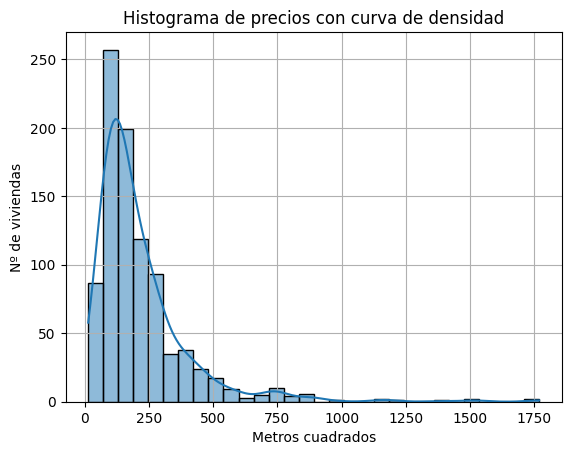

In [9]:
sns.histplot(meters, kde=True, bins=30,);
plt.title("Histograma de precios con curva de densidad")
plt.xlabel("Metros cuadrados")
plt.ylabel("Nº de viviendas")
plt.grid()

### CUARTILES (Q1, Q2, Q3)

#### Q1

In [10]:
q1_price = np.quantile(a = price, q = 0.25, interpolation = "lower")
q1_baths = np.quantile(a = baths, q = 0.25, interpolation = "lower")
q1_roms = np.quantile(a = roms, q = 0.25, interpolation = "lower")
q1_meters = np.quantile(a = meters, q = 0.25, interpolation = "lower")
print("Q1")
print(q1_price)
print(q1_baths)
print(q1_roms)
print(q1_meters)

Q1
625000
2
2
104


#### Grafico Q1

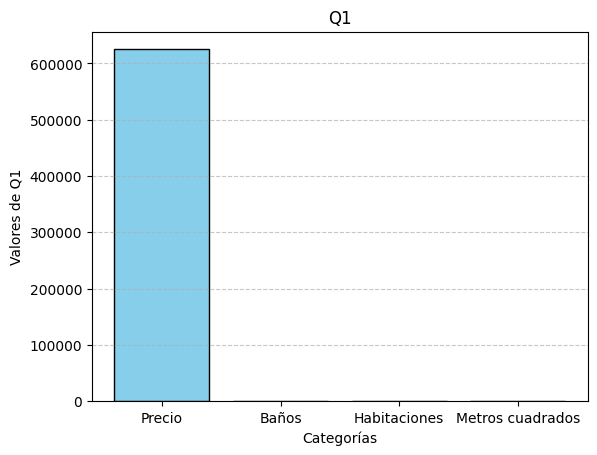

In [11]:
# Categorías y valores de Q1
categorias = ["Precio", "Baños", "Habitaciones", "Metros cuadrados"]
valores_q1 = [q1_price, q1_baths, q1_roms, q1_meters]

# Gráfico de barras
plt.bar(categorias, valores_q1, color="skyblue", edgecolor="black")

# Etiquetas y título
plt.title("Q1")
plt.ylabel("Valores de Q1")
plt.xlabel("Categorías")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()

#### Q2

In [12]:
q2_price = np.quantile(a = price, q = 0.5, interpolation = "lower")
q2_baths = np.quantile(a = baths, q = 0.5, interpolation = "lower")
q2_roms = np.quantile(a = roms, q = 0.5, interpolation = "lower")
q2_meters= np.quantile(a = meters, q = 0.5, interpolation = "lower")
print("Q2")
print(q2_price)
print(q2_baths)
print(q2_roms)
print(q2_meters)

Q2
990000
3
3
158


#### Grafico Q2

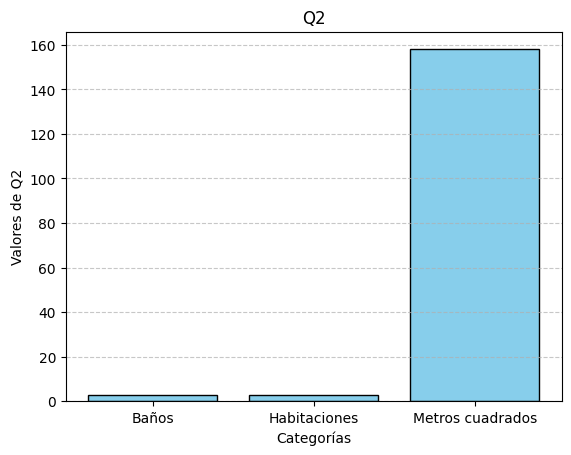

In [13]:
# AL INCLUIR EL PRECIO LOS OTROS 3 VALORES NO SE APRECIABAN DEBIDO A LA DIFERENCIA, POR ESO NO LO HE INCLUIDO

# Categorías y valores de Q2
categorias = ["Baños", "Habitaciones", "Metros cuadrados"]
valores_q2 = [q2_baths, q2_roms, q2_meters]

# Gráfico de barras
plt.bar(categorias, valores_q2, color="skyblue", edgecolor="black")

# Etiquetas y título
plt.title("Q2")
plt.ylabel("Valores de Q2")
plt.xlabel("Categorías")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()

#### Q3

In [14]:
q3_price = np.quantile(a = price, q = 0.75, interpolation = "lower")
q3_baths = np.quantile(a = baths, q = 0.75, interpolation = "lower")
q3_roms = np.quantile(a = roms, q = 0.75, interpolation = "lower")
q3_meters = np.quantile(a = meters, q = 0.75, interpolation = "lower")
print("Q3")
print(q3_price)
print(q3_baths)
print(q3_roms)
print(q3_meters)

Q3
1650000
4
4
264


#### Grafico Q3

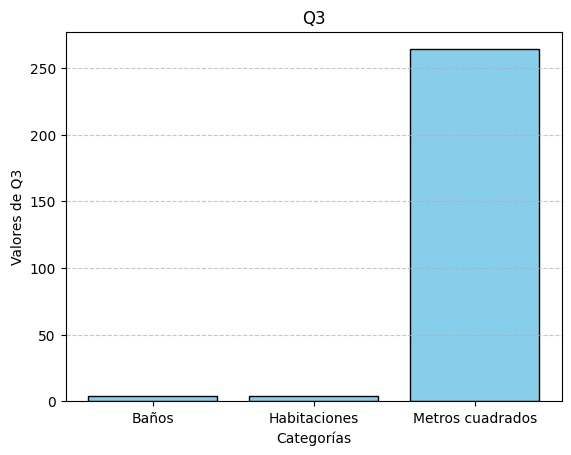

In [15]:
# AL INCLUIR EL PRECIO LOS OTROS 3 VALORES NO SE APRECIABAN DEBIDO A LA DIFERENCIA, POR ESO NO LO HE INCLUIDO IGUAL QUE EN EL ANTERIOR
# Categorías y valores de Q2
categorias = ["Baños", "Habitaciones", "Metros cuadrados"]
valores_q3 = [q3_baths, q3_roms, q3_meters]

# Gráfico de barras
plt.bar(categorias, valores_q3, color="skyblue", edgecolor="black")

# Etiquetas y título
plt.title("Q3")
plt.ylabel("Valores de Q3")
plt.xlabel("Categorías")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()

### IQR

IQR Price
1025000


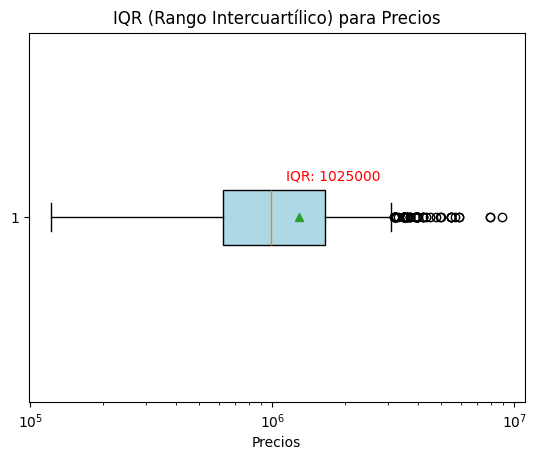

In [16]:
print("IQR Price")
Q1 = np.quantile(a = price, q = 0.25, interpolation = "lower")
Q3 = np.quantile(a = price, q = 0.75, interpolation = "lower")
IQR = Q3 - Q1
print(IQR)

# Crear el Boxplot
plt.boxplot(price, vert=False, patch_artist=True, showmeans=True,
            boxprops=dict(facecolor="lightblue"))

# Pongo escala logarítmica en el eje X para que se represente correctamente el precio
plt.xscale('log')

# Etiquetas y título
plt.title("IQR (Rango Intercuartílico) para Precios")
plt.xlabel("Precios")
plt.annotate(f"IQR: {IQR}", xy=(Q1 + IQR / 2, 1.1), fontsize=10, color="red")

# Mostrar el gráfico
plt.show()

IQR Baths
2


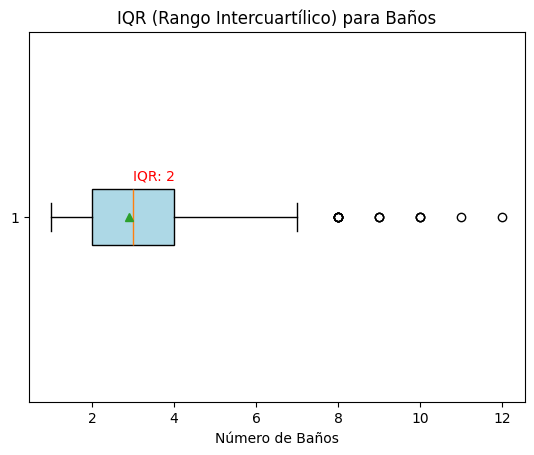

In [17]:
print("IQR Baths")
Q1 = np.quantile(a = baths, q = 0.25, interpolation = "lower")
Q3 = np.quantile(a = baths, q = 0.75, interpolation = "lower")
IQR = Q3 - Q1
print(IQR)

plt.boxplot(baths, vert=False, patch_artist=True, showmeans=True,
            boxprops=dict(facecolor="lightblue"))

plt.title("IQR (Rango Intercuartílico) para Baños")
plt.xlabel("Número de Baños")
plt.annotate(f"IQR: {IQR}", xy=(Q1 + IQR / 2, 1.1), fontsize=10, color="red")

plt.show()

IQR Roms
2


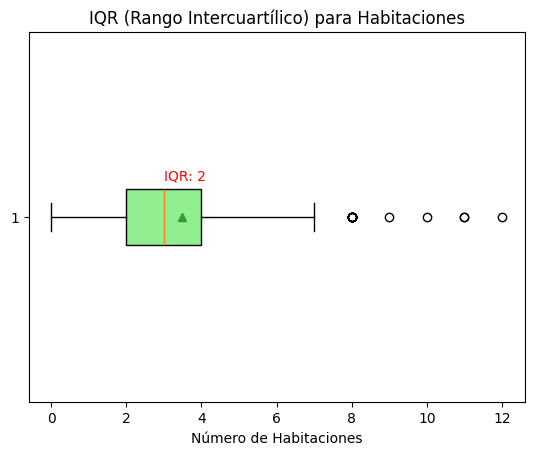

In [18]:
print("IQR Roms")
Q1 = np.quantile(a = roms, q = 0.25, interpolation = "lower")
Q3 = np.quantile(a = roms, q = 0.75, interpolation = "lower")
IQR = Q3 - Q1
print(IQR)

# Crear el Boxplot
plt.boxplot(roms, vert=False, patch_artist=True, showmeans=True,
            boxprops=dict(facecolor="lightgreen"))

# Etiquetas y título
plt.title("IQR (Rango Intercuartílico) para Habitaciones")
plt.xlabel("Número de Habitaciones")
plt.annotate(f"IQR: {IQR}", xy=(Q1 + IQR / 2, 1.1), fontsize=10, color="red")

# Mostrar el gráfico
plt.show()

IQR Meters
160


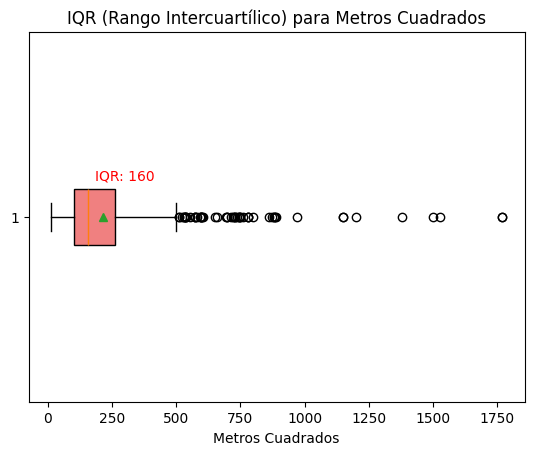

In [19]:
print("IQR Meters")
Q1 = np.quantile(a = meters, q = 0.25, interpolation = "lower")
Q3 = np.quantile(a = meters, q = 0.75, interpolation = "lower")
IQR = Q3 - Q1
print(IQR)

plt.boxplot(meters, vert=False, patch_artist=True, showmeans=True,
            boxprops=dict(facecolor="lightcoral"))

plt.title("IQR (Rango Intercuartílico) para Metros Cuadrados")
plt.xlabel("Metros Cuadrados")
plt.annotate(f"IQR: {IQR}", xy=(Q1 + IQR / 2, 1.1), fontsize=10, color="red")

plt.show()

### FILTRAR 20 % MAS CARO, Y EL 20 % MAS BARATO

529900.0


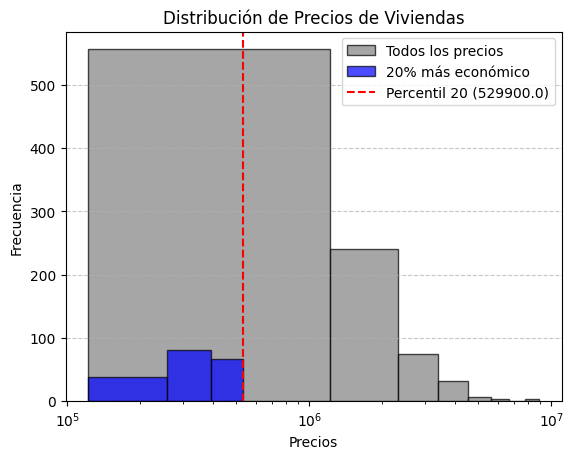

In [20]:
percentil_price_20 = np.percentile(price, 20)
porcentaje_20_price = price[price <= percentil_price_20]
print(percentil_price_20)

# Crear el gráfico
plt.hist(price, bins=8, color="gray", edgecolor="black", alpha=0.7, label="Todos los precios")
plt.hist(porcentaje_20_price, bins=3, color="blue", edgecolor="black", alpha=0.7, label="20% más económico")

# Pongo escala logarítmica en el eje X para que se represente correctamente
plt.xscale('log')

# Etiquetas y título
plt.title("Distribución de Precios de Viviendas")
plt.xlabel("Precios")
plt.ylabel("Frecuencia")
plt.axvline(percentil_price_20, color="red", linestyle="--", label=f"Percentil 20 ({percentil_price_20})")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()

2.0


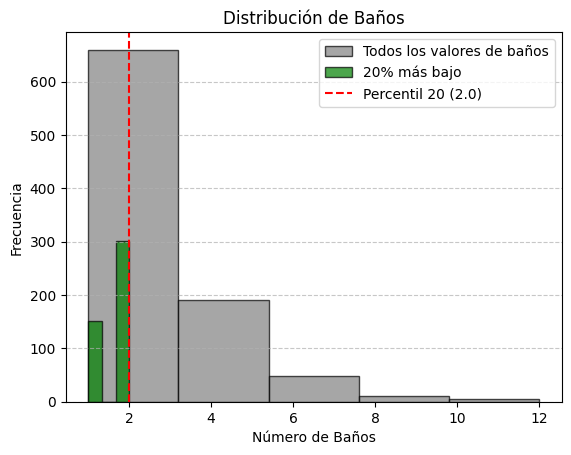

In [21]:
percentil_baths_20 = np.percentile(baths, 20)
porcentaje_20_baths= baths[baths <= percentil_baths_20]
print(percentil_baths_20)

plt.hist(baths, bins=5, color="gray", edgecolor="black", alpha=0.7, label="Todos los valores de baños")
plt.hist(porcentaje_20_baths, bins=3, color="green", edgecolor="black", alpha=0.7, label="20% más bajo")

plt.title("Distribución de Baños")
plt.xlabel("Número de Baños")
plt.ylabel("Frecuencia")
plt.axvline(percentil_baths_20, color="red", linestyle="--", label=f"Percentil 20 ({percentil_baths_20})")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

2.0


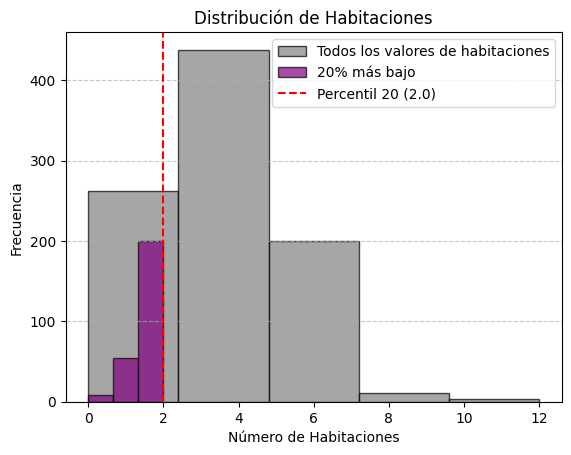

In [22]:
percentil_roms_20 = np.percentile(roms, 20)
porcentaje_20_roms= roms[roms <= percentil_roms_20]
print(percentil_roms_20)

plt.hist(roms, bins=5, color="gray", edgecolor="black", alpha=0.7, label="Todos los valores de habitaciones")
plt.hist(porcentaje_20_roms, bins=3, color="purple", edgecolor="black", alpha=0.7, label="20% más bajo")

plt.title("Distribución de Habitaciones")
plt.xlabel("Número de Habitaciones")
plt.ylabel("Frecuencia")
plt.axvline(percentil_roms_20, color="red", linestyle="--", label=f"Percentil 20 ({percentil_roms_20})")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


97.0


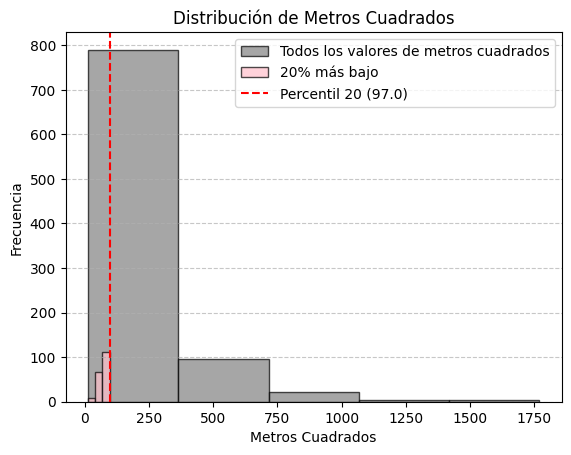

In [23]:
percentil_meters_20 = np.percentile(meters, 20)
porcentaje_20_meters= meters[meters <= percentil_meters_20]
print(percentil_meters_20)

plt.hist(meters, bins=5, color="gray", edgecolor="black", alpha=0.7, label="Todos los valores de metros cuadrados")
plt.hist(porcentaje_20_meters, bins=3, color="pink", edgecolor="black", alpha=0.7, label="20% más bajo")

plt.title("Distribución de Metros Cuadrados")
plt.xlabel("Metros Cuadrados")
plt.ylabel("Frecuencia")
plt.axvline(percentil_meters_20, color="red", linestyle="--", label=f"Percentil 20 ({percentil_meters_20})")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

1850000.0


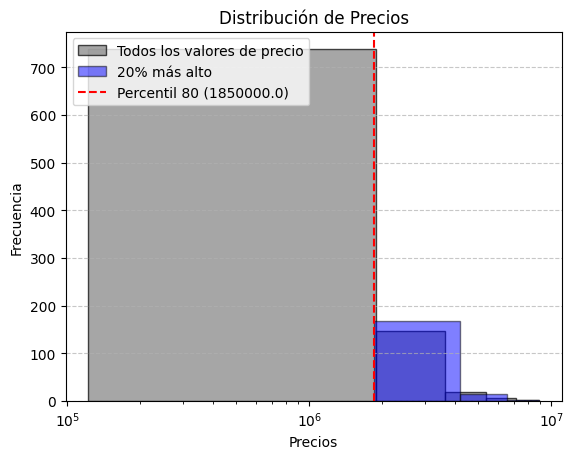

In [24]:
percentil_price_80 = np.percentile(price, 80)
porcentaje_80_price = price[price >= percentil_price_80]
print(percentil_price_80)

plt.hist(price, bins=5, color="gray", edgecolor="black",alpha=0.7, label="Todos los valores de precio")
plt.hist(porcentaje_80_price, bins=3, color="blue", edgecolor="black", alpha=0.5, label="20% más alto")

# Pongo escala logarítmica en el eje X para que se represente correctamente
plt.xscale('log')

plt.title("Distribución de Precios")
plt.xlabel("Precios")
plt.ylabel("Frecuencia")
plt.axvline(percentil_price_80, color="red", linestyle="--", label=f"Percentil 80 ({percentil_price_80})")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()


4.0


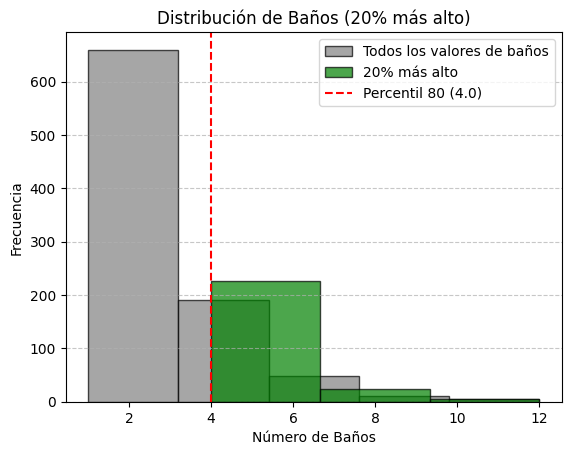

In [25]:
percentil_baths_80 = np.percentile(baths, 80)
porcentaje_80_baths = baths[baths >= percentil_baths_80]
print(percentil_baths_80)

plt.hist(baths, bins=5, color="gray", edgecolor="black", alpha=0.7, label="Todos los valores de baños")
plt.hist(porcentaje_80_baths, bins=3, color="green", edgecolor="black", alpha=0.7, label="20% más alto")
plt.axvline(percentil_baths_80, color="red", linestyle="--", label=f"Percentil 80 ({percentil_baths_80})")

plt.title("Distribución de Baños (20% más alto)")
plt.xlabel("Número de Baños")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

5.0


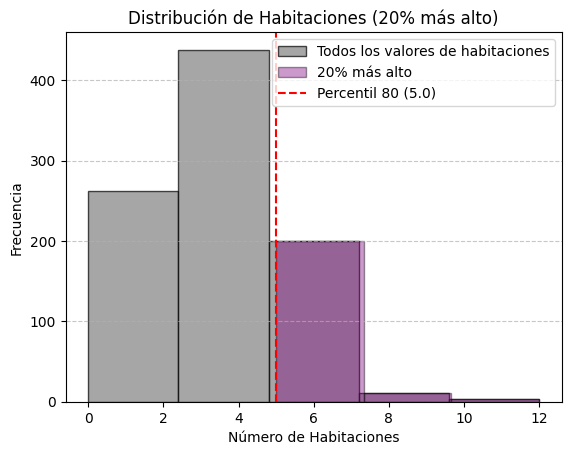

In [26]:
percentil_roms_80 = np.percentile(roms, 80)
porcentaje_80_roms = roms[roms >= percentil_roms_80]
print(percentil_roms_80)

plt.hist(roms, bins=5, color="gray", edgecolor="black", alpha=0.7, label="Todos los valores de habitaciones")
plt.hist(porcentaje_80_roms, bins=3, color="purple", edgecolor="black", alpha=0.4, label="20% más alto")
plt.axvline(percentil_roms_80, color="red", linestyle="--", label=f"Percentil 80 ({percentil_roms_80})")

plt.title("Distribución de Habitaciones (20% más alto)")
plt.xlabel("Número de Habitaciones")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

292.20000000000005


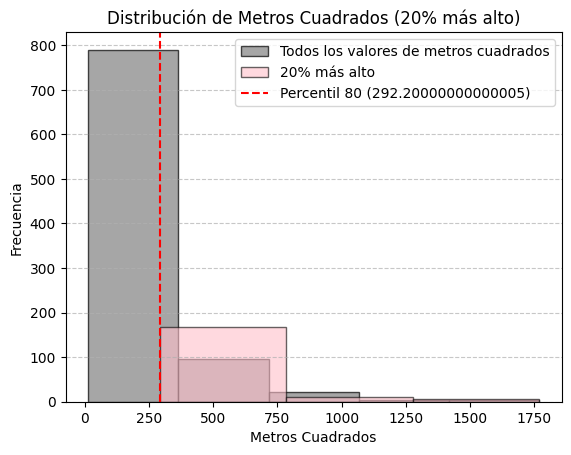

In [27]:
percentil_meters_80 = np.percentile(meters, 80)
porcentaje_80_meters = meters[meters >= percentil_meters_80]
print(percentil_meters_80)

plt.hist(meters, bins=5, color="gray", edgecolor="black", alpha=0.7, label="Todos los valores de metros cuadrados")
plt.hist(porcentaje_80_meters, bins=3, color="pink", edgecolor="black", alpha=0.6, label="20% más alto")
plt.axvline(percentil_meters_80, color="red", linestyle="--", label=f"Percentil 80 ({percentil_meters_80})")


plt.title("Distribución de Metros Cuadrados (20% más alto)")
plt.xlabel("Metros Cuadrados")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

### MODA

In [67]:
cont_price = Counter(price)
cont_price.items()

# Precios más frecuentes
print("Precios más frecuentes")
cont_price.most_common(5)

Precios más frecuentes


[(np.int64(850000), 15),
 (np.int64(1200000), 14),
 (np.int64(2500000), 13),
 (np.int64(1300000), 12),
 (np.int64(1650000), 12)]

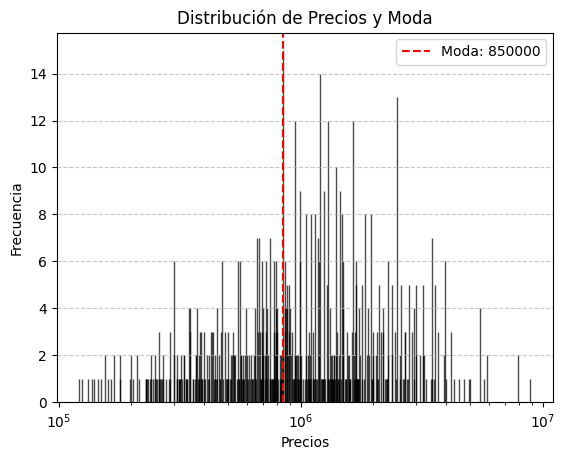

In [81]:
precios = list(cont_price.keys())
frecuencias = list(cont_price.values())

# Calcular la moda (valor más frecuente)
moda = max(cont_price.items(), key=lambda x: x[1])[0]

plt.bar(precios, frecuencias, color="skyblue", edgecolor="black", alpha=0.7)
plt.axvline(moda, color="red", linestyle="--", label=f"Moda: {moda}")
plt.xscale('log')

plt.title("Distribución de Precios y Moda")
plt.xlabel("Precios")
plt.ylabel("Frecuencia")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [66]:
# Precios menos frecuentes
cont_price_min = sorted(cont_price.items(), key = lambda item: item[1])
print("Precios menos frecuentes")
cont_price_min [:5]

Precios menos frecuentes


[(np.int64(1590750), 1),
 (np.int64(5700000), 1),
 (np.int64(752248), 1),
 (np.int64(1295000), 1),
 (np.int64(1970000), 1)]

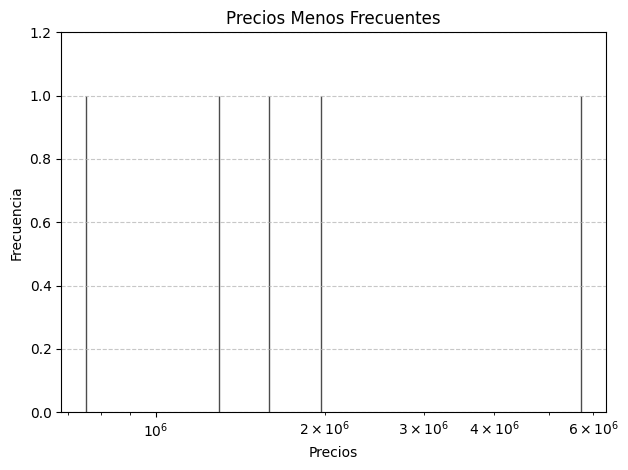

In [80]:
cont_price = Counter(price)

# Extraer los precios menos frecuentes
cont_price_min = sorted(cont_price.items(), key=lambda item: item[1])

# Los 5 precios menos frecuentes
prices_min_keys = [item[0] for item in cont_price_min[:5]]
prices_min_values = [item[1] for item in cont_price_min[:5]]

# Crear el gráfico de barras para los precios menos frecuentes
plt.bar(prices_min_keys, prices_min_values, color="lightcoral", edgecolor="black", alpha=0.7)
plt.xscale('log')

# Ajustar el rango del eje Y para que se vean mejor las barras
plt.ylim(0, max(prices_min_values) + 0.2)

plt.title("Precios Menos Frecuentes", fontsize=12)
plt.xlabel("Precios", fontsize=10)
plt.ylabel("Frecuencia", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

In [82]:
cont_baths = Counter(baths)
cont_baths.items()

# Nº de baños más frecuentes
print("Número de baños más frecuente")
cont_baths.most_common(5)

Número de baños más frecuente


[(np.int64(2), 301),
 (np.int64(3), 207),
 (np.int64(1), 152),
 (np.int64(4), 120),
 (np.int64(5), 71)]

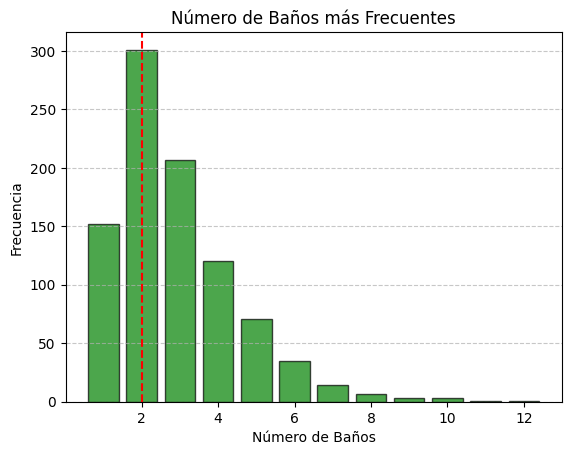

In [88]:
cont_baths = Counter(baths)
baths_keys = list(cont_baths.keys())
baths_values = list(cont_baths.values())

moda = max(cont_baths.items(), key=lambda x: x[1])[0]
plt.axvline(moda, color="red", linestyle="--", label=f"Moda: {moda}")

plt.bar(baths_keys, baths_values, color="green", edgecolor="black", alpha=0.7)

plt.title("Número de Baños más Frecuentes")
plt.xlabel("Número de Baños")
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [61]:
# Nº de baños menos frecuentes
cont_baths_min = sorted(cont_baths.items(), key = lambda item: item[1])
print("Número de baños menos frecuente")
cont_baths_min [:5]

Número de baños menos frecuente


[(np.int64(11), 1),
 (np.int64(12), 1),
 (np.int64(9), 3),
 (np.int64(10), 3),
 (np.int64(8), 7)]

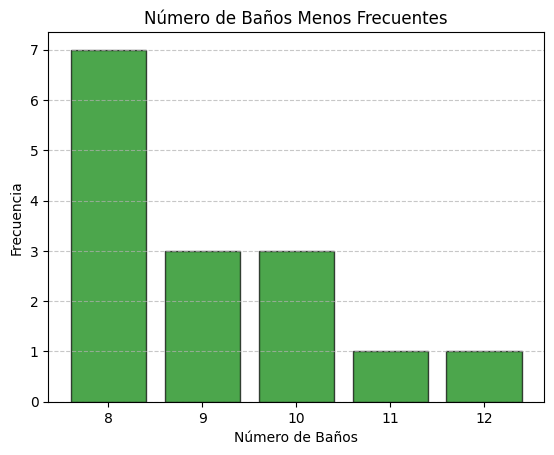

In [130]:
cont_baths_min = sorted(cont_baths.items(), key = lambda item: item[1])
baths_min_keys = [item[0] for item in cont_baths_min[:5]]
baths_min_values = [item[1] for item in cont_baths_min[:5]]
# Crear el gráfico de barras para los baños menos frecuentes
plt.bar(baths_min_keys, baths_min_values, color="green", edgecolor="black", alpha=0.7)

# Etiquetas y título
plt.title("Número de Baños Menos Frecuentes")
plt.xlabel("Número de Baños")
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Mostrar el gráfico
plt.show()

In [60]:
cont_roms = Counter(roms)
cont_baths.items()

# Nº de habitaciones más frecuentes
print("Número de habitaciones más frecuente")
cont_roms.most_common(5)

Número de habitaciones más frecuente


[(np.int64(3), 254),
 (np.int64(2), 200),
 (np.int64(4), 184),
 (np.int64(5), 128),
 (np.int64(1), 54)]

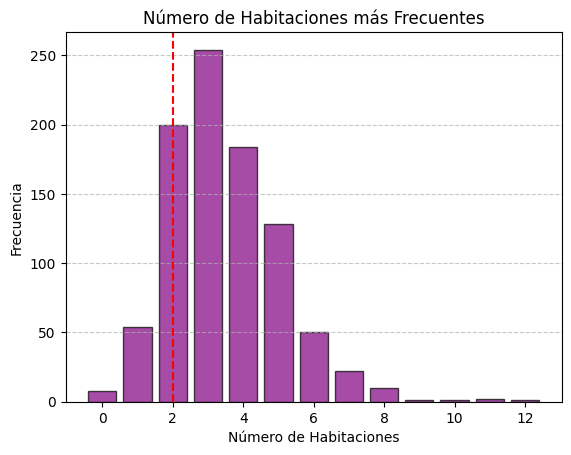

In [87]:
roms_keys = list(cont_roms.keys())
roms_values = list(cont_roms.values())

plt.bar(roms_keys, roms_values, color="purple", edgecolor="black", alpha=0.7)

moda = max(cont_baths.items(), key=lambda x: x[1])[0]
plt.axvline(moda, color="red", linestyle="--", label=f"Moda: {moda}")

plt.title("Número de Habitaciones más Frecuentes")
plt.xlabel("Número de Habitaciones")
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [47]:
# Nº de habitaciones menos frecuentes
cont_roms = Counter(roms)
cont_roms_min = sorted(cont_roms.items(), key = lambda item: item[1])
print("Número de habitaciones menos frecuente")
cont_roms_min [:5]

[(np.int64(10), 1),
 (np.int64(12), 1),
 (np.int64(9), 1),
 (np.int64(11), 2),
 (np.int64(0), 8)]

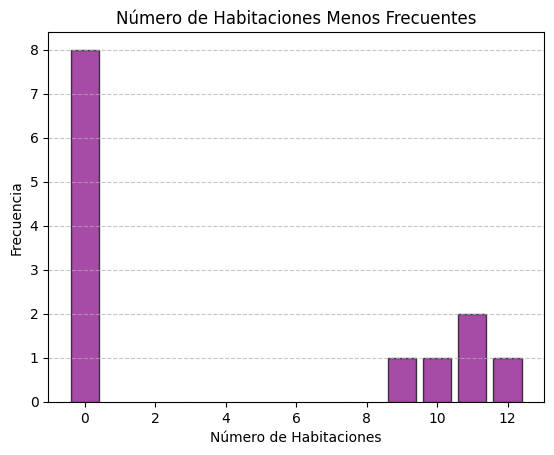

In [50]:
cont_roms_min = sorted(cont_roms.items(), key=lambda item: item[1])

rooms_min_keys = [item[0] for item in cont_roms_min[:5]]
rooms_min_values = [item[1] for item in cont_roms_min[:5]]

plt.bar(rooms_min_keys, rooms_min_values, color="purple", edgecolor="black", alpha=0.7)

plt.title("Número de Habitaciones Menos Frecuentes")
plt.xlabel("Número de Habitaciones")
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="--", alpha=0.7)

In [59]:
cont_meters = Counter(meters)
cont_meters.items()

# Nº de metros más frecuentes
print("Metros cuadrados mas frecuentes")
cont_meters.most_common(5)

Metros cuadrados mas frecuentes


[(np.int64(133), 12),
 (np.int64(150), 12),
 (np.int64(104), 11),
 (np.int64(120), 11),
 (np.int64(75), 10)]

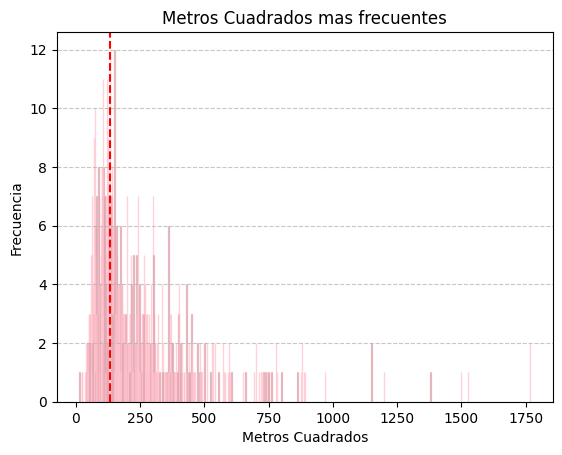

In [90]:
meters_keys = list(cont_meters.keys())
meters_values = list(cont_meters.values())

plt.bar(meters_keys, meters_values, color="black", edgecolor="pink", alpha=0.7)

moda = max(cont_meters.items(), key=lambda x: x[1])[0]
plt.axvline(moda, color="red", linestyle="--", label=f"Moda: {moda}")

plt.title("Metros Cuadrados mas frecuentes")
plt.xlabel("Metros Cuadrados")
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [93]:
# Nº de metros menos frecuentes
cont_meters_min = sorted(cont_meters.items(), key = lambda item: item[1])
print("Metros Cuadrados menos Frecuentes")
cont_meters_min [:5]

Metros Cuadrados menos Frecuentes


[(np.int64(886), 1),
 (np.int64(261), 1),
 (np.int64(438), 1),
 (np.int64(485), 1),
 (np.int64(95), 1)]

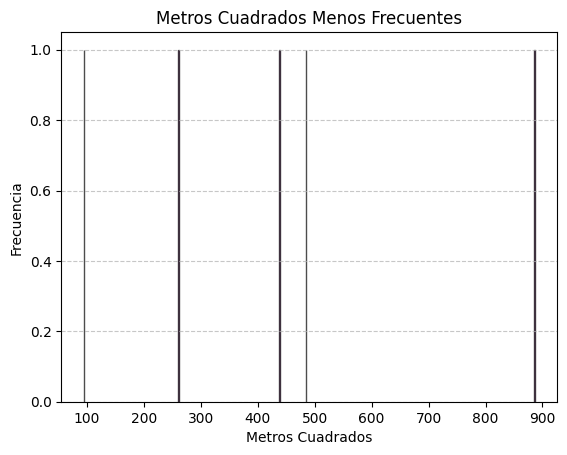

In [96]:
cont_meters_min = sorted(cont_meters.items(), key=lambda item: item[1])

meters_min_keys = [item[0] for item in cont_meters_min[:5]]
meters_min_values = [item[1] for item in cont_meters_min[:5]]

plt.bar(meters_min_keys, meters_min_values, color="purple", edgecolor="black", alpha=0.7)

plt.title("Metros Cuadrados Menos Frecuentes")
plt.xlabel("Metros Cuadrados")
plt.ylabel("Frecuencia")
plt.grid(axis="y", linestyle="--", alpha=0.7)

In [31]:
cont_address = Counter(address)
cont_address.items()

# Barrios más frecuentes
cont_address.most_common(5)

[('Barrio de Salamanca', 63),
 ('Hortaleza', 60),
 ('Chamartín', 54),
 ('Moncloa', 48),
 ('Centro', 47)]

In [32]:
cont_address_min = sorted(cont_address.items(), key = lambda item: item[1])
cont_address_min [:5]

[('Comillas', 1),
 ('Bellas Vistas', 1),
 ('Pau de Carabanchel', 1),
 ('Zofío', 1),
 ('Legazpi', 1)]

### Dispersión: varianza y desviación estándar

In [33]:
# Varianza en los precios
np.var(price)

1073448095137.2623

In [34]:
# Desviacion estandar en los precios
np.std(price)

1036073.4023886833

In [35]:
# Varianza en los baños
np.var(baths)

2.6425680074054165

In [36]:
# Desviacion estandar en los baños
np.std(baths)

1.625597738496648

In [37]:
# Varianza en las habitaciones
np.var(roms)

2.540050762937084

In [38]:
# Desviacion estandar en las habitaciones
np.std(roms)

1.5937536707211326

In [39]:
# Varianza en los metros
np.var(meters)

36726.2798483084

In [40]:
# Desviacion estandar en los metros
np.std(meters)

191.64101817802054

### FILTRO DE OUTLIERS (Z-SCORE Y GRAFICO DE OUTLIERS)

In [41]:
# Z-Score Precios
def prices_z_score(price, z = 3):
    
    # Media y estandar
    prices_mean = np.mean(price)
    prices_std = np.std(price)
    
    # Limites laterales
    limit_l_prices = prices_mean - z*prices_std
    limit_r_prices = prices_mean + z*prices_std
    
    # Filtramos los que estan fuera de los limites laterales (Outliers)
    price_out = [pri for pri in price if pri < limit_l_prices or pri > limit_r_prices]
    
    # Filtrmos los precios que no son outliers
    norm_price = [pri for pri in price if pri not in price_out]
    
    # Devolvemos ambos arrays
    return np.array(norm_price), np.array(price_out)

norm_price, price_out = prices_z_score(price)
print(f"Nº total de no-outliers: {len(norm_price)}")
print(f"Total de outliers: {len(price_out)}\n")

print("Estos son los outliers")
print(price_out)

Nº total de no-outliers: 901
Total de outliers: 14

Estos son los outliers
[5700000 4950000 7900000 5500000 5500000 5000000 5900000 5500000 8900000
 5900000 4500000 5500000 4750000 7900000]


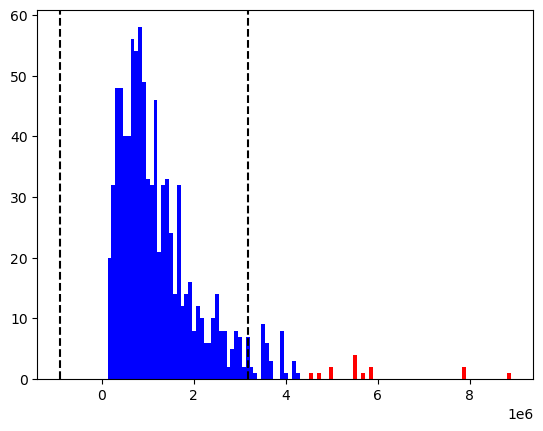

In [42]:
# Grafico outlayers precio
q1_price = np.quantile(price, 0.25)
q3_price = np.quantile(price, 0.75)
ric_price = q3_price - q1_price

lim_l_price = q1_price - 1.5*ric_price
lim_r_price = q3_price + 1.5*ric_price

# No-Outliers
plt.hist(norm_price, bins = 50, color = "blue")

# Outliers
plt.hist(price_out, bins = 50, color = "red")

# Q1
plt.axvline(lim_l_price, color = "black", linestyle = "--")

# Q3
plt.axvline(lim_r_price, color = "black", linestyle = "--")

plt.show()

In [43]:
# Z-Score Baños
def baths_z_score(baths, z = 3):
    
    # Media y estandar
    baths_mean = np.mean(baths)
    baths_std = np.std(baths)
    
    # Limites laterales
    limit_l_baths = baths_mean - z*baths_std
    limit_r_baths = baths_mean + z*baths_std
    
    # Filtramos los que estan fuera de los limites laterales (Outliers)
    baths_out = [bath for bath in baths if bath < limit_l_baths or bath > limit_r_baths]
    
    # Filtrmos los precios que no son outliers
    norm_baths = [bath for bath in baths if bath not in baths_out]
    
    # Devolvemos ambos arrays
    return np.array(norm_baths), np.array(baths_out)

norm_baths, baths_out = baths_z_score(baths)
print(f"Nº total de no-outliers: {len(norm_baths)}")
print(f"Total de outliers: {len(baths_out)}\n")

print("Estos son los outliers")
print(baths_out)

Nº total de no-outliers: 900
Total de outliers: 15

Estos son los outliers
[ 8  9  8  8 11 10  8  8  8  8  9 10 12 10  9]


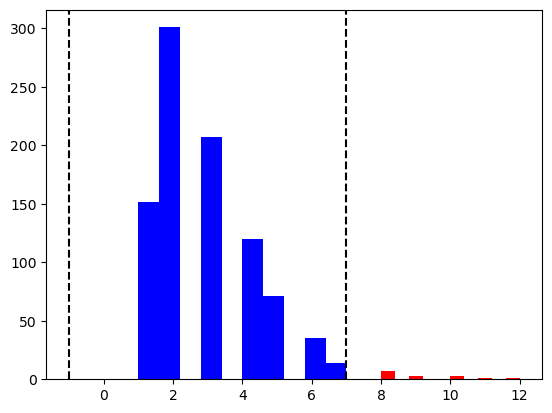

In [44]:
# Grafico outlayers baños
q1_baths = np.quantile(baths, 0.25)
q3_baths = np.quantile(baths, 0.75)
ric_baths = q3_baths - q1_baths

lim_l_baths = q1_baths - 1.5*ric_baths
lim_r_baths = q3_baths + 1.5*ric_baths

# No-Outliers
plt.hist(norm_baths, bins = 10, color = "blue")

# Outliers
plt.hist(baths_out, bins = 10, color = "red")

# Q1
plt.axvline(lim_l_baths, color = "black", linestyle = "--")

# Q3
plt.axvline(lim_r_baths, color = "black", linestyle = "--")

plt.show()

In [45]:
# Z-Score Habitaciones
def roms_z_score(roms, z = 3):
    
    # Media y estandar
    roms_mean = np.mean(roms)
    roms_std = np.std(roms)
    
    # Limites laterales
    limit_l_roms = roms_mean - z*roms_std
    limit_r_roms = roms_mean + z*roms_std
    
    # Filtramos los que estan fuera de los limites laterales (Outliers)
    roms_out = [rom for rom in roms if rom < limit_l_roms or rom > limit_r_roms]
    
    # Filtrmos los precios que no son outliers
    norm_roms = [rom for rom in roms if rom not in roms_out]
    
    # Devolvemos ambos arrays
    return np.array(norm_roms), np.array(roms_out)

norm_roms, roms_out = roms_z_score(roms)
print(f"Nº total de no-outliers: {len(norm_roms)}")
print(f"Total de outliers: {len(roms_out)}\n")

print("Estos son los outliers")
print(roms_out)

Nº total de no-outliers: 910
Total de outliers: 5

Estos son los outliers
[10 11 12  9 11]


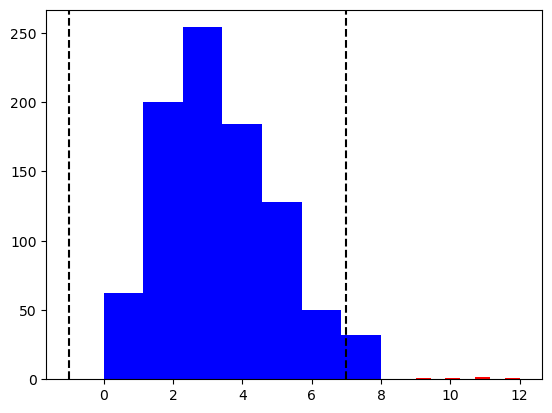

In [46]:
# Grafico outlayers habitaciones
q1_roms = np.quantile(roms, 0.25)
q3_roms = np.quantile(roms, 0.75)
ric_roms = q3_roms - q1_roms

lim_l_roms = q1_roms - 1.5*ric_roms
lim_r_roms = q3_roms + 1.5*ric_roms

# No-Outliers
plt.hist(norm_roms, bins = 7, color = "blue")

# Outliers
plt.hist(roms_out, bins = 7, color = "red")

# Q1
plt.axvline(lim_l_roms, color = "black", linestyle = "--")

# Q3
plt.axvline(lim_r_roms, color = "black", linestyle = "--")

plt.show()

In [47]:
# Z-Score Metros
def meters_z_score(meters, z = 3):
    
    # Media y estandar
    meters_mean = np.mean(meters)
    meters_std = np.std(meters)
    
    # Limites laterales
    limit_l_meters = meters_mean - z*meters_std
    limit_r_meters = meters_mean + z*meters_std
    
    # Filtramos los que estan fuera de los limites laterales (Outliers)
    meters_out = [meter for meter in meters if meter < limit_l_meters or meter > limit_r_meters]
    
    # Filtrmos los precios que no son outliers
    norm_meters = [meter for meter in meters if meter not in meters_out]
    
    # Devolvemos ambos arrays
    return np.array(norm_meters), np.array(meters_out)

norm_meters, meters_out = roms_z_score(meters)
print(f"Nº total de no-outliers: {len(norm_meters)}")
print(f"Total de outliers: {len(meters_out)}\n")

print("Estos son los outliers")
print(meters_out)

Nº total de no-outliers: 899
Total de outliers: 16

Estos son los outliers
[ 886 1150 1525  890 1500  800  875  881  862 1150 1380  881 1200 1768
  969 1768]


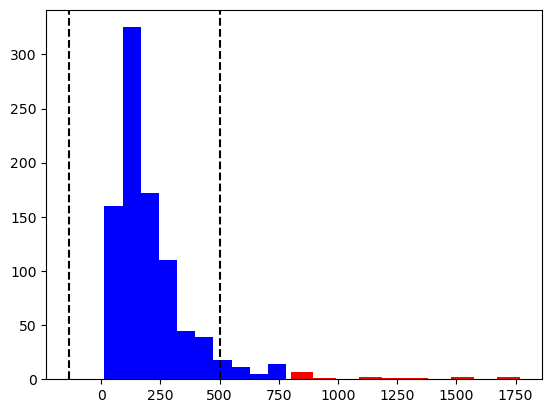

In [48]:
# Grafico outlayers metros
q1_meters = np.quantile(meters, 0.25)
q3_meters = np.quantile(meters, 0.75)
ric_meters = q3_meters - q1_meters

lim_l_meters = q1_meters - 1.5*ric_meters
lim_r_meters = q3_meters + 1.5*ric_meters

# No-Outliers
plt.hist(norm_meters, bins = 10, color = "blue")

# Outliers
plt.hist(meters_out, bins = 10, color = "red")

# Q1
plt.axvline(lim_l_meters, color = "black", linestyle = "--")

# Q3
plt.axvline(lim_r_meters, color = "black", linestyle = "--")

plt.show()

* Correlación: calcular la matriz y pintarla con matplotlib/seaborn
* Estandarización

### FILTRO DE OUTLIERS (TUKEY)

In [49]:
# Tukey precio

def out_price_tukey(price, k = 1.5):
    
    # Calculamos los cuartiles Q1 y Q3
    q1_price_tukey = np.quantile(price, 0.25)
    q3_price_tukey = np.quantile(price, 0.75)
    
    # Rango InterCuartil
    ric_price_tukey = q3_price_tukey - q1_price_tukey
    
    # Calculamos los límites laterales
    lim_l_price_tukey = q1_price_tukey - k*ric_price_tukey
    lim_r_price_tukey = q3_price_tukey + k*ric_price_tukey
    
    # Filtramos los elementos del array, los que esten fuera de los limites laterales.
    outli_price_tukey = [out for out in price if out < lim_l_price_tukey or out > lim_r_price_tukey]
    
    
    # Filtramos los elementos del array, los que no pertenezcan a outliers.
    norm_price_tukey = [out for out in price if out not in outli_price_tukey]
    
    # Retornamos ambos arrays, uno con los datos sin outliers, otro con los outliers
    return np.array(norm_price_tukey), np.array(outli_price_tukey)

norm_price_tukey, outli_price_tukey = out_price_tukey(price)

print(f"Total de no-outliers: {len(norm_price_tukey)}")
print(f"Total de outliers: {len(outli_price_tukey)}\n")

print("Estos son los outliers")
print(outli_price_tukey)

Total de no-outliers: 860
Total de outliers: 55

Estos son los outliers
[5700000 3950000 3900000 4950000 7900000 5500000 3500000 3550000 3200000
 3500000 3500000 4300000 5500000 3600000 3900000 5000000 3700000 3600000
 3600000 5900000 4200000 3600000 3500000 3950000 5500000 4200000 8900000
 3465000 3700000 3700000 3490000 3950000 3200000 3200000 3250000 5900000
 3200000 3950000 3195000 3950000 3200000 3600000 4500000 3500000 4200000
 5500000 3500000 4750000 3500000 3195000 4000000 3250000 3300000 3950000
 7900000]


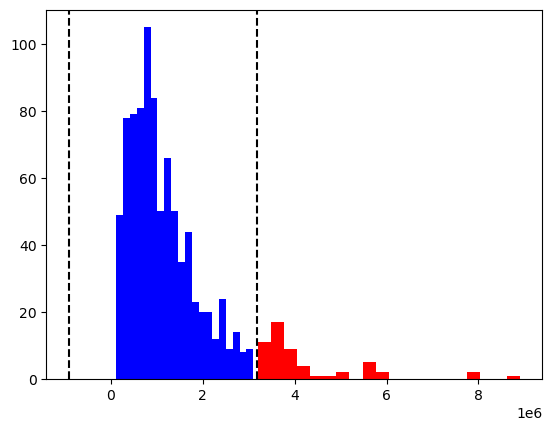

In [50]:
# Grafico outliers tukey precio 

# Calculamos los cuartiles Q1 y Q3
q1_price_tukey = np.quantile(price, 0.25)
q3_price_tukey = np.quantile(price, 0.75)
    
# Rango InterCuartil
ric_price_tukey = q3_price_tukey - q1_price_tukey
    
# Calculamos los límites laterales
lim_l_price_tukey = q1_price_tukey - 1.5*ric_price_tukey
lim_r_price_tukey = q3_price_tukey + 1.5*ric_price_tukey


# No-Outliers
plt.hist(norm_price_tukey, bins = 20, color = "blue")

# Outliers
plt.hist(outli_price_tukey, bins = 20, color = "red")

# Q1 - 1.5*ric
plt.axvline(lim_l_price_tukey, color = "black", linestyle = "--")

# Q3 + 1.5*ric
plt.axvline(lim_r_price_tukey, color = "black", linestyle = "--")

plt.show()

In [51]:
# Tukey baños

def out_baths_tukey(baths, k = 1.5):
    
    q1_baths_tukey = np.quantile(baths, 0.25)
    q3_baths_tukey = np.quantile(baths, 0.75)
    
    ric_baths_tukey = q3_baths_tukey - q1_baths_tukey
    
    lim_l_baths_tukey = q1_baths_tukey - k*ric_baths_tukey
    lim_r_baths_tukey = q3_baths_tukey + k*ric_baths_tukey
    
    outli_baths_tukey = [out for out in baths if out < lim_l_baths_tukey or out > lim_r_baths_tukey]
    
    norm_baths_tukey = [out for out in baths if out not in outli_baths_tukey]
    
    return np.array(norm_baths_tukey), np.array(outli_baths_tukey)

norm_baths_tukey, outli_baths_tukey = out_baths_tukey(baths)

print(f"Total de no-outliers: {len(norm_baths_tukey)}")
print(f"Total de outliers: {len(outli_baths_tukey)}\n")

print("Estos son los outliers")
print(outli_baths_tukey)

Total de no-outliers: 900
Total de outliers: 15

Estos son los outliers
[ 8  9  8  8 11 10  8  8  8  8  9 10 12 10  9]


In [52]:
# Grafico outliers tukey baños

In [53]:
# Tukey habitaciones

def out_roms_tukey(roms, k = 1.5):
    
    q1_roms_tukey = np.quantile(roms, 0.25)
    q3_roms_tukey = np.quantile(roms, 0.75)
    
    ric_roms_tukey = q3_roms_tukey - q1_roms_tukey
    
    lim_l_roms_tukey = q1_roms_tukey - k*ric_roms_tukey
    lim_r_roms_tukey = q3_roms_tukey + k*ric_roms_tukey
    
    outli_roms_tukey = [out for out in roms if out < lim_l_roms_tukey or out > lim_r_roms_tukey]
    
    norm_roms_tukey = [out for out in roms if out not in outli_roms_tukey]
 
    return np.array(norm_roms_tukey), np.array(outli_roms_tukey)

norm_roms_tukey, outli_roms_tukey = out_price_tukey(roms)

print(f"Total de no-outliers: {len(norm_roms_tukey)}")
print(f"Total de outliers: {len(outli_roms_tukey)}\n")

print("Estos son los outliers")
print(outli_roms_tukey)

Total de no-outliers: 900
Total de outliers: 15

Estos son los outliers
[ 8  8  8 10  8  8  8 11 12  9  8  8 11  8  8]


In [54]:
# Grafico outliers tukey habitaciones

In [55]:
# Tukey metros

def out_meters_tukey(meters, k = 1.5):

    q1_meters_tukey = np.quantile(meters, 0.25)
    q3_meters_tukey = np.quantile(meters, 0.75)

    ric_meters_tukey = q3_meters_tukey - q1_meters_tukey

    lim_l_meters_tukey = q1_meters_tukey - k*ric_meters_tukey
    lim_r_meters_tukey = q3_meters_tukey + k*ric_meters_tukey

    outli_meters_tukey = [out for out in meters if out < lim_l_meters_tukey or out > lim_r_meters_tukey]

    norm_meters_tukey = [out for out in meters if out not in outli_meters_tukey]

    return np.array(norm_meters_tukey), np.array(outli_meters_tukey)

norm_meters_tukey, outli_meters_tukey = out_meters_tukey(meters)

print(f"Total de no-outliers: {len(norm_meters_tukey)}")
print(f"Total de outliers: {len(outli_meters_tukey)}\n")

print("Estos son los outliers")
print(outli_meters_tukey)

Total de no-outliers: 860
Total de outliers: 55

Estos son los outliers
[ 886 1150 1525  580  605  780  720  890 1500  694  800  875  745  746
  881  862  738  510  650 1150  713 1380  750  601  700  533  530  725
  596  596  730  881  573  510  593  530  573  540  555  524  780 1200
  749  540  595 1768  728  969  533  781  761 1768  700  575  660]


In [56]:
# Grafico outliers tukey precio

### Correlación: calcular la matriz y pintarla con matplotlib/seaborn

In [57]:
#Calculo de la correlacion
print(f" Precio / Precio {stats.pearsonr(price, price)[0]}") # Da 1 porque es la misma columna
print(f" Precio / Baños {stats.pearsonr(price, baths)[0]}")
print(f" Precio / Habitaciones {stats.pearsonr(price, roms)[0]}")
print(f" Precio / Metros {stats.pearsonr(price, meters)[0]}")

 Precio / Precio 1.0
 Precio / Baños 0.6916252947603285
 Precio / Habitaciones 0.5571893208650716
 Precio / Metros 0.6817624075882127


In [58]:
# Dibujamos la matriz
columnas = [price, baths, roms, meters] # 5 columnas del CSV

matriz_lista = list()

for columna1 in columnas:
    fila = list()
    for columna2 in columnas:
        fila.append(stats.pearsonr(columna1, columna2)[0])
    
    matriz_lista.append(fila)
    
matriz = np.array(matriz_lista)
print(matriz)

[[1.         0.69162529 0.55718932 0.68176241]
 [0.69162529 1.         0.77076481 0.81873292]
 [0.55718932 0.77076481 1.         0.71265478]
 [0.68176241 0.81873292 0.71265478 1.        ]]


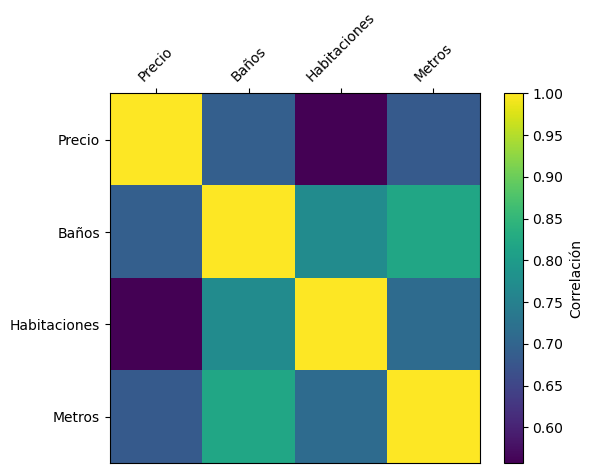

In [59]:
column_names_matriz = ['Precio', 'Baños', 'Habitaciones', 'Metros']
plt.imshow(matriz, cmap='viridis')
plt.colorbar(label='Correlación')
plt.xticks(range(len(column_names_matriz)), column_names_matriz, rotation=45)
plt.yticks(range(len(column_names_matriz)), column_names_matriz)
plt.gca().xaxis.set_ticks_position('top')

<Axes: >

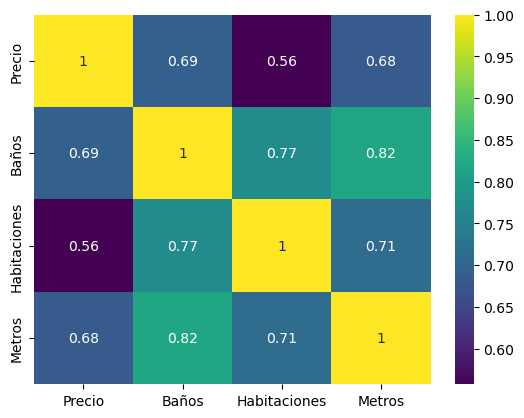

In [60]:
# Con seaborn
sns.heatmap(matriz, annot=True, cmap='viridis', xticklabels=column_names_matriz, yticklabels=column_names_matriz)

### Estandarización

In [61]:
# Guardamos los valores originales y los estandarizados en variables

# Media
price_mean = np.mean(price)
baths_mean = np.mean(baths)
roms_mean = np.mean(roms)
meters_mean = np.mean(meters)

# Mediana
price_median = np.median(price)
baths_median = np.median(baths)
roms_median = np.median(roms)
meters_median = np.median(meters)

# Desviacion estandar
price_std = np.std(price)
baths_std = np.std(baths)
roms_std = np.std(roms)
meters_std = np.std(meters)

In [62]:
# Estandarizamos

price_standard = (price - price_mean) / price_std
baths_standard = (baths - baths_mean) / baths_std
roms_standard = (roms - roms_mean) / roms_std
meters_standard = (meters - meters_mean) / meters_std

print(f"Precio estandarizado: {price_standard[:3]}")
print(f"Baños estandarizados: {baths_standard[:3]}")
print(f"Habitaciones estandarizadas: {roms_standard[:3]}")
print(f"Metros estandarizados: {meters_standard[:3]}")

Precio estandarizado: [0.60750979 0.67989849 0.00909659]
Baños estandarizados: [0.06117968 0.06117968 0.06117968]
Habitaciones estandarizadas: [-0.29760994 -0.29760994  0.32983959]
Metros estandarizados: [-0.17865826 -0.24649343  0.27531553]


### ASIMETRIA

In [63]:
print(f"Coeficiente de asimetría de precios: {stats.skew(price)}")
print(f"Coeficiente de asimetría de baños: {stats.skew(baths)}")
print(f"Coeficiente de asimetría de habitaciones: {stats.skew(roms)}")
print(f"Coeficiente de asimetría de metros: {stats.skew(meters)}")

Coeficiente de asimetría de precios: 2.299673447902698
Coeficiente de asimetría de baños: 1.406223480498869
Coeficiente de asimetría de habitaciones: 0.8842091486712003
Coeficiente de asimetría de metros: 3.358506945156488


### INTERPRETACION RESULTADOS ASIMETRIA

1. Positiva (Sesgo a la derecha): La mayoría de los datos están concentrados en la parte baja.
2. Negativa (Sesgo a la izquierda): La mayoría de los datos están concentrados en la parte alta.
3. Cercana a 0: La distribución es simétrica.

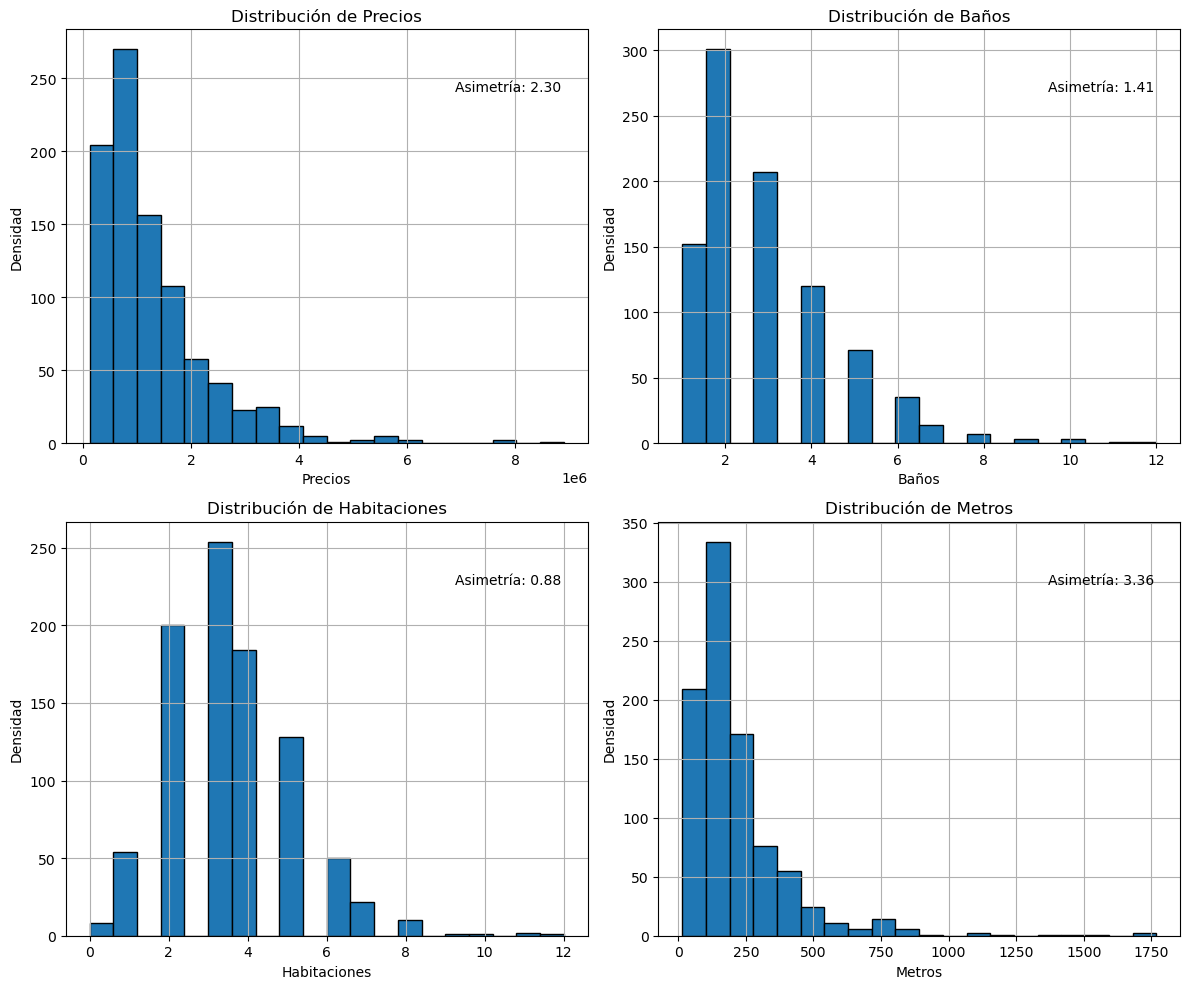

In [64]:
# Diccionario para iterar sobre los datos
datasets = {
    "Precios": price,
    "Baños": baths,
    "Habitaciones": roms,
    "Metros": meters
}

# Crear subgráficas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()  # Para iterar fácilmente sobre las subgráficas

for ax, (label, data) in zip(axes, datasets.items()):  # Cambié price por data para evitar confusión
    # Graficar histograma
    ax.hist(data, bins=20, edgecolor="black")
    
    # Calcular asimetría
    asimetria = skew(data)
    
    # Anotar el coeficiente de asimetría
    ax.text(0.95, 0.85, f"Asimetría: {asimetria:.2f}", transform=ax.transAxes, ha="right", fontsize=10)
    ax.set_title(f"Distribución de {label}")
    ax.set_xlabel(label)
    ax.set_ylabel("Densidad")
    ax.grid()

# Ajustar el espacio entre subgráficas
plt.tight_layout()
plt.show()

### CURTOSIS

In [65]:
print(f"Curtosis de precios: {stats.kurtosis(price)}")
print(f"Curtosis de baños: {stats.kurtosis(baths)}")
print(f"Curtosis de habitaciones: {stats.kurtosis(roms)}")
print(f"Curtosis de metros: {stats.kurtosis(meters)}")

Curtosis de precios: 8.547211919938682
Curtosis de baños: 3.038919834628685
Curtosis de habitaciones: 1.9002632477464054
Curtosis de metros: 17.229111152834456


### INTERPRETACION RESULTADOS CURTOSIS

1. Leptocúrtica ($k_3 > 0$): Decaimiento rápido, cola ligera.
2. Mesocúrtica ($k_3=0$): Curva normal.
3. Paticúrtica ($k_3<0$ ): Decaimiento lento.

Primeros 10 valores de Precios: [1920000 1995000 1300000 1650000 1590750 1590000 5700000 2190000 1190000
  675000]
Primeros 10 valores de Baños: [3 3 3 3 3 4 5 4 2 2]
Primeros 10 valores de Habitaciones: [3 3 4 3 3 5 4 4 2 3]
Primeros 10 valores de Metros: [183 170 270 248 116 360 305 183 112 153]


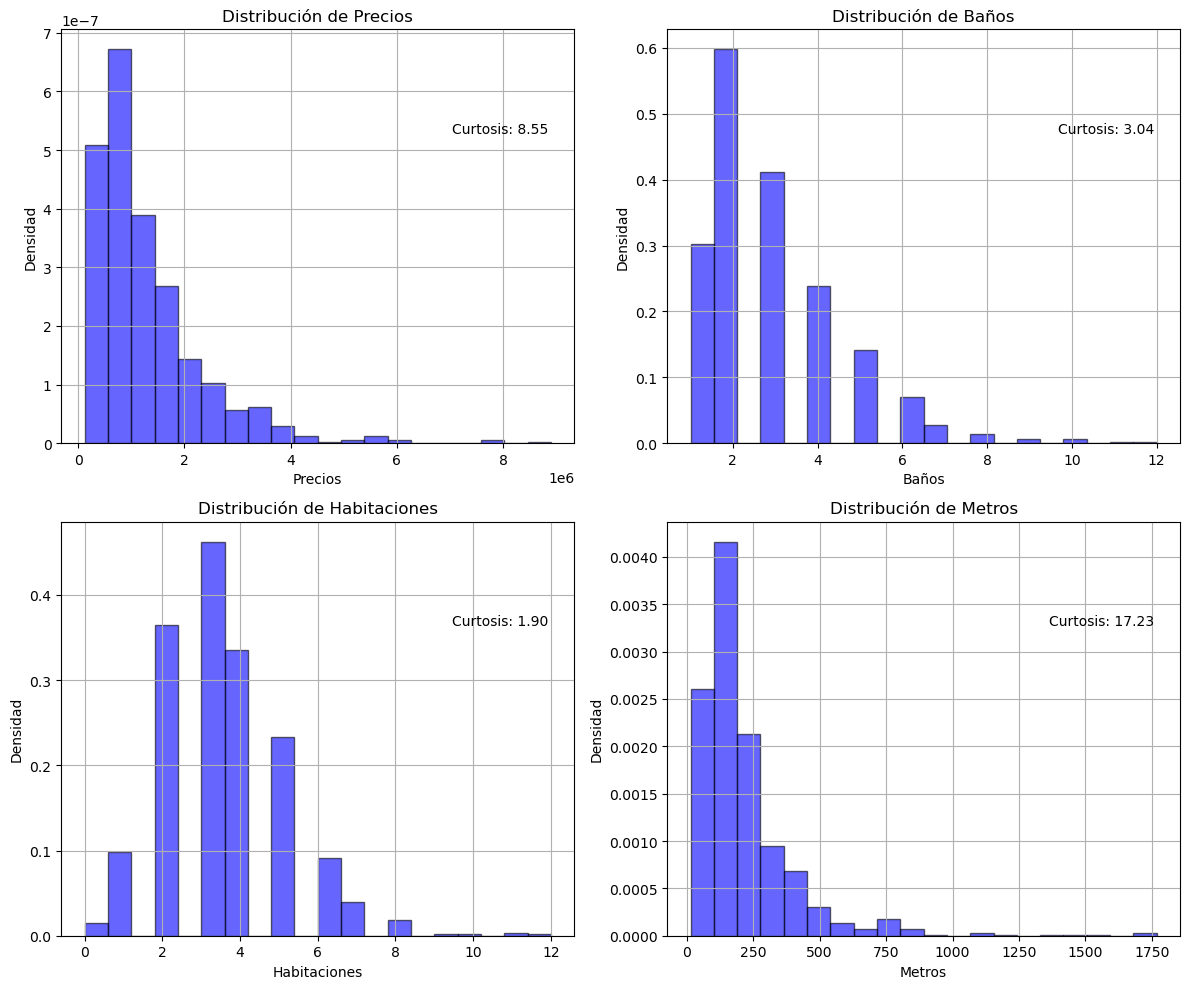

In [66]:
# Diccionario para iterar sobre los datos
datasets = {
    "Precios": price,
    "Baños": baths,
    "Habitaciones": roms,
    "Metros": meters
}

# Crear subgráficas
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()  # Para iterar fácilmente sobre las subgráficas

for ax, (label, data) in zip(axes, datasets.items()):
    print(f"Primeros 10 valores de {label}: {data[:10]}")
    
    
    # Graficar histograma
    ax.hist(data, bins=20, density=True, alpha=0.6, color="blue", edgecolor="black")
    
    # Calcular asimetría y curtosis
    asimetria = skew(data)
    curtosis = kurtosis(data)
    
    # Anotar métricas en el gráfico
    ax.text(0.95, 0.75, f"Curtosis: {curtosis:.2f}", transform=ax.transAxes, ha="right", fontsize=10)
    ax.set_title(f"Distribución de {label}")
    ax.set_xlabel(label)
    ax.set_ylabel("Densidad")
    ax.grid()

# Ajustar el espacio entre subgráficas
plt.tight_layout()
plt.show()

### TRANSFORMAR DISTRIBUCIONES E INTERPRETAR RESULTADOS

In [67]:
# Funcion raiz
price_sqrt = np.sqrt(price)
baths_sqrt = np.sqrt(baths)
roms_sqrt = np.sqrt(roms)
meters_sqrt = np.sqrt(meters)

#Funcion logaritmo
price_log = np.log(price)
baths_log = np.log(baths)
roms_log = np.log(roms)
meters_log = np.log(meters)

/var/folders/5p/hnv1v0ts6gn6djggjh17clth0000gn/T/ipykernel_3886/906595267.py:10: RuntimeWarning: divide by zero encountered in log
  roms_log = np.log(roms)


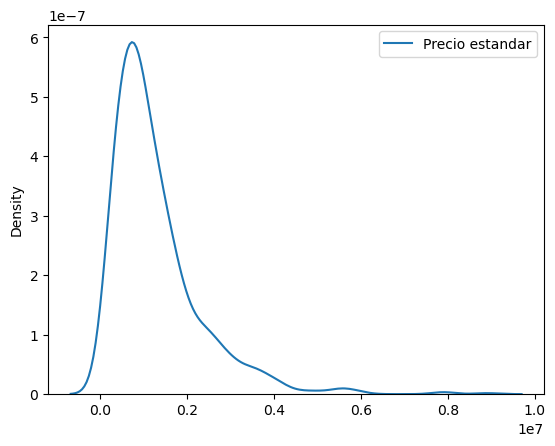

In [68]:
# Graficas precios, las he puesto en 3 separadas porque no se apreciaban las transformadas. Las demas estan todas en 1
sns.kdeplot(price, label = "Precio estandar")
plt.legend();

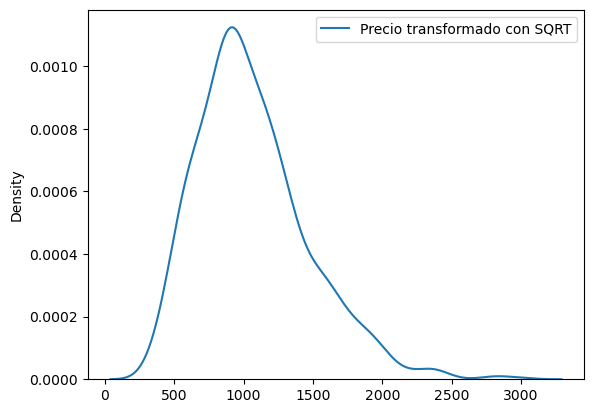

In [69]:
sns.kdeplot(price_sqrt, label = "Precio transformado con SQRT")
plt.legend();

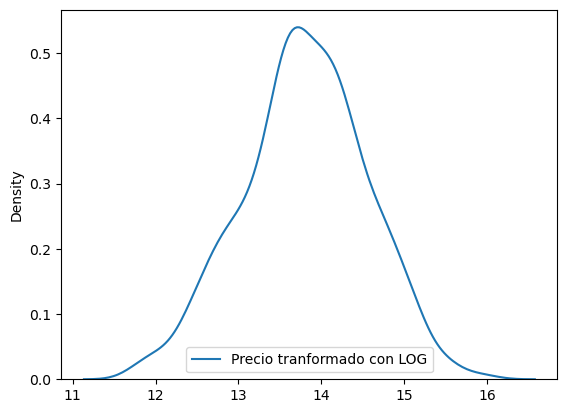

In [70]:
sns.kdeplot(price_log, label = "Precio tranformado con LOG")
plt.legend();

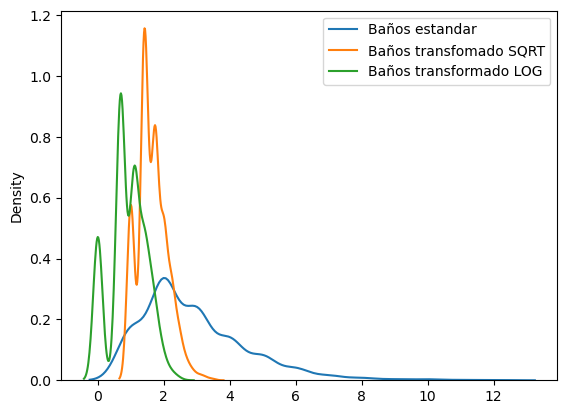

In [71]:
sns.kdeplot(baths, label = "Baños estandar")
sns.kdeplot(baths_sqrt, label = "Baños transfomado SQRT")
sns.kdeplot(baths_log, label = "Baños transformado LOG")
plt.legend();

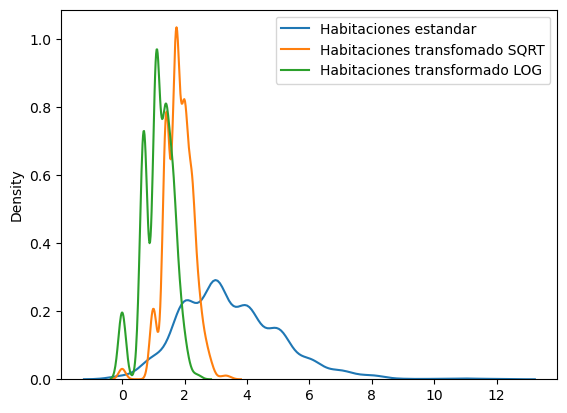

In [72]:
sns.kdeplot(roms, label = "Habitaciones estandar")
sns.kdeplot(roms_sqrt, label = "Habitaciones transfomado SQRT")
sns.kdeplot(roms_log, label = "Habitaciones transformado LOG")
plt.legend();

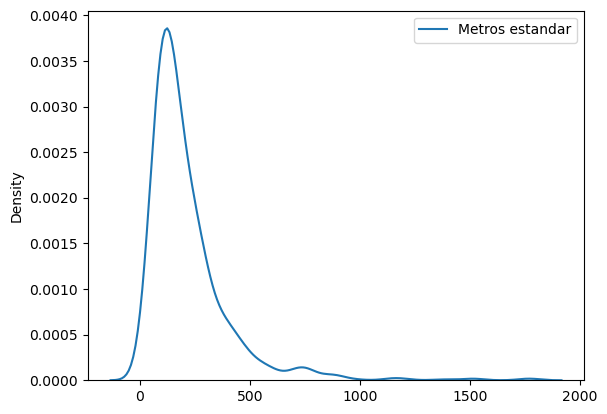

In [73]:
sns.kdeplot(meters, label = "Metros estandar")
plt.legend();

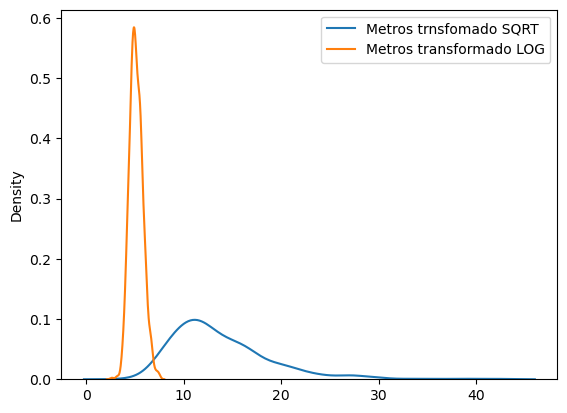

In [74]:
#sns.kdeplot(meters, label = "Metros estandar")
sns.kdeplot(meters_sqrt, label = "Metros trnsfomado SQRT")
sns.kdeplot(meters_log, label = "Metros transformado LOG")
plt.legend();

### CONTRASTE DE HIPOTESIS

In [120]:
# Las casas de X barrio son más baratas de las de Y barrio
file_path = "../Data/idealista_madrid.csv"
datos = np.genfromtxt(file_path, delimiter=",", encoding="utf-8-sig", names=True)  # names = True si hay encabezados para que los lea

# Verifica las columnas disponibles
print("Columnas disponibles:", data.dtype.names)

# Extraer las columnas necesarias
prices = datos["price"]  # Columna de precios
addresses = datos["address"]  # Columna de direcciones

# Filtrar los datos por barrio
barrio_x_prices = prices[addresses == "Recoletos"]
barrio_y_prices = prices[addresses == "Castellana"]

# Comprobar los tamaños de las muestras
print(f"Número de datos en Recoletos: {len(barrio_x_prices)}")
print(f"Número de datos en Castellana: {len(barrio_y_prices)}")

# Realizar la prueba t para dos muestras independientes
t_stat, p_value = ttest_ind(barrio_x_prices, barrio_y_prices, alternative="less")

# Resultados del contraste
print(f"Estadístico t: {t_stat:.2f}")
print(f"Valor p: {p_value:.4f}")

# Interpretación
alpha = 0.05
if p_value < alpha:
    print("Rechazamos H0: Las casas en Recoletos son significativamente más baratas que las de Castellana.")
else:
    print("No podemos rechazar H0: No hay evidencia suficiente para afirmar que las casas en Recoletos son más baratas.")


Columnas disponibles: ('price', 'baths', 'rooms', 'sqft', 'address')
Número de datos en Recoletos: 0
Número de datos en Castellana: 0
Estadístico t: nan
Valor p: nan
No podemos rechazar H0: No hay evidencia suficiente para afirmar que las casas en Recoletos son más baratas.


In [ ]:
# Las casas de >= 3 baños son más caras que las casas de 1-2 baños

In [ ]:
# Ejemplo Alan contraste hipotesis
barrio_x = "Recoletos"
barrio_y = "Hortaleza"
precios_x = price[addresses == barrio_x]
precios_y = price[addresses == barrio_y]

* Opcional: filtrar los barrios 20 % más baratos
* Opcional: Moda de los barrios más baratos y más caros